<a href="https://colab.research.google.com/github/imdeja/Jake_Dennis_DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Jake_Dennis_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-03-17 18:19:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-03-17 18:19:56 (138 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [50]:
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('house-votes-84.data', names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [52]:
df = df.replace({'y': 1, 'n': 0, '?': np.NaN})

df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [53]:
df['water-project'].mean()

0.5038759689922481

In [54]:
water = df['water-project'].dropna()
water = water.to_numpy()
water

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [55]:
water.shape

(387,)

In [56]:
water.mean()

0.5038759689922481

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  s = data.std(ddof=1)
  stderr = s / np.sqrt(n)
  # Lookup the t-statistic that corresponds to 95% area under the curve
  # for my given degrees of freedom: 386
  t = stats.t.ppf((1 + confidence) / 1.96613, n - 1)
  margin_of_error = t*stderr
  return (mean, mean - margin_of_error, mean + margin_of_error)

In [62]:
mean, lower, upper = confidence_interval(water)
print(mean)
print(lower)
print(upper)

0.5038759689922481
0.44253824068593384
0.5652136972985623


In [63]:
#Standard Error
0.5652136972985623-0.5038759689922481

0.06133772830631423

SE=.06

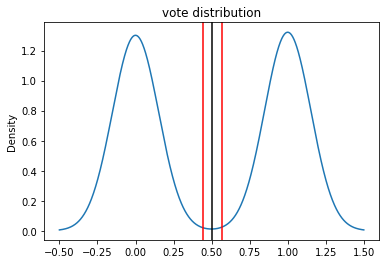

In [64]:
import matplotlib.pyplot as plt
CI = confidence_interval(water)

df['water-project'].plot.density()
plt.title("vote distribution")
plt.axvline(x=CI[1], color='red')
plt.axvline(x=CI[0], color='black')
plt.axvline(x=CI[2], color='red');
plt.show()

Interpret the confidence interval - what does it tell you about the data and its distribution?
- It captures 95% of theoritical sample means. These are calculated given a certain sample size. It really doesn't tell us much about our raw data.
-The distrubution is even distibuted between 0 and 1. It looks like normal distribution.

Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
--By hand using Numpy
--In a single line using Scipy

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [35]:
observed_frequencies = pd.crosstab(df['race'], df['education'], margins=True)

observed_frequencies

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
race,,,,,,,,,,,,,,,,,
Amer-Indian-Eskimo,16,14,5,4,2,9,5,8,19,21,3,119,5,0,2,79,311
Asian-Pac-Islander,13,21,9,5,18,11,9,29,38,289,28,226,88,6,41,208,1039
Black,133,153,70,16,21,56,89,107,112,330,11,1174,86,5,15,746,3124
Other,9,10,14,9,13,17,8,8,6,33,2,78,7,2,4,51,271
White,762,977,335,134,279,553,403,915,1207,4682,369,8904,1537,38,514,6207,27816
All,933,1175,433,168,333,646,514,1067,1382,5355,413,10501,1723,51,576,7291,32561


In [36]:
observed = pd.crosstab(df['race'], df['education'])

observed = observed.values

observed

array([[  16,   14,    5,    4,    2,    9,    5,    8,   19,   21,    3,
         119,    5,    0,    2,   79],
       [  13,   21,    9,    5,   18,   11,    9,   29,   38,  289,   28,
         226,   88,    6,   41,  208],
       [ 133,  153,   70,   16,   21,   56,   89,  107,  112,  330,   11,
        1174,   86,    5,   15,  746],
       [   9,   10,   14,    9,   13,   17,    8,    8,    6,   33,    2,
          78,    7,    2,    4,   51],
       [ 762,  977,  335,  134,  279,  553,  403,  915, 1207, 4682,  369,
        8904, 1537,   38,  514, 6207]])

In [39]:
row_sums = observed_frequencies.iloc[0:5, 16:].values
row_sums = row_sums.T[0]

row_sums

array([  311,  1039,  3124,   271, 27816])

In [42]:
col_sums = observed_frequencies.iloc[5:, 0:16].values
col_sums = col_sums[0]

col_sums

array([  933,  1175,   433,   168,   333,   646,   514,  1067,  1382,
        5355,   413, 10501,  1723,    51,   576,  7291])

In [43]:
total_total = df.shape[0]

total_total

32561

In [44]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total_total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
print(expected.shape)  
print(expected)

(5, 16)
[[8.91136636e+00 1.12227819e+01 4.13571451e+00 1.60461902e+00
  3.18058413e+00 6.17014219e+00 4.90937011e+00 1.01912411e+01
  1.31999017e+01 5.11472314e+01 3.94468843e+00 1.00298240e+02
  1.64568963e+01 4.87116489e-01 5.50155094e+00 6.96385553e+01]
 [2.97714137e+01 3.74934738e+01 1.38167440e+01 5.36076902e+00
  1.06258100e+01 2.06134332e+01 1.64014004e+01 3.40472651e+01
  4.40987070e+01 1.70874512e+02 1.31785572e+01 3.35079973e+02
  5.49797918e+01 1.62737631e+00 1.83797795e+01 2.32650994e+02]
 [8.95148183e+01 1.12733024e+02 4.15433187e+01 1.61184239e+01
  3.19490188e+01 6.19791775e+01 4.93147016e+01 1.02371180e+02
  1.32593225e+02 5.13774761e+02 3.96244587e+01 1.00749744e+03
  1.65309788e+02 4.89309296e+00 5.52631676e+01 6.99520408e+02]
 [7.76520991e+00 9.77933724e+00 3.60378981e+00 1.39823715e+00
  2.77150579e+00 5.37655477e+00 4.27793987e+00 8.88047050e+00
  1.15021652e+01 4.45688093e+01 3.43733301e+00 8.73981450e+01
  1.43402537e+01 4.24464851e-01 4.79395596e+00 6.06818280e+

In [45]:
observed.shape

(5, 16)

In [48]:
chi2 = ((observed-expected)**2 / expected).sum()
chi2

730.6712962254585

Null Hypothesis: The two variables are independent

Alternative: The two variables are dependent (there is a relationship between them)

Confidence Level: 95%

In [49]:
chi2, p_value, dof, expected = stats.chi2_contingency(observed)

print(chi2)
print(p_value)
print(dof)
print(expected)

730.6712962254585
5.547319569858429e-116
60
[[8.91136636e+00 1.12227819e+01 4.13571451e+00 1.60461902e+00
  3.18058413e+00 6.17014219e+00 4.90937011e+00 1.01912411e+01
  1.31999017e+01 5.11472314e+01 3.94468843e+00 1.00298240e+02
  1.64568963e+01 4.87116489e-01 5.50155094e+00 6.96385553e+01]
 [2.97714137e+01 3.74934738e+01 1.38167440e+01 5.36076902e+00
  1.06258100e+01 2.06134332e+01 1.64014004e+01 3.40472651e+01
  4.40987070e+01 1.70874512e+02 1.31785572e+01 3.35079973e+02
  5.49797918e+01 1.62737631e+00 1.83797795e+01 2.32650994e+02]
 [8.95148183e+01 1.12733024e+02 4.15433187e+01 1.61184239e+01
  3.19490188e+01 6.19791775e+01 4.93147016e+01 1.02371180e+02
  1.32593225e+02 5.13774761e+02 3.96244587e+01 1.00749744e+03
  1.65309788e+02 4.89309296e+00 5.52631676e+01 6.99520408e+02]
 [7.76520991e+00 9.77933724e+00 3.60378981e+00 1.39823715e+00
  2.77150579e+00 5.37655477e+00 4.27793987e+00 8.88047050e+00
  1.15021652e+01 4.45688093e+01 3.43733301e+00 8.73981450e+01
  1.43402537e+01 4.2446

Conclusion: Based on a chi^2 value of 730.7 and a p-value of ~0, we reject the null hypothesis that the education level obtained by census responders and the race of those responders is independent, and suggest the alternative that these two variables are related.

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)